1.84595 3.5374


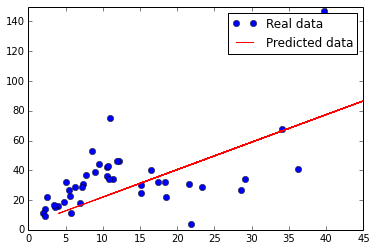

In [5]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import xlrd

%matplotlib inline

# local data file directory
DATA_FILE = "data/fire_theft.xls"

# STEP 0: read in data from xls file
book = xlrd.open_workbook(DATA_FILE, encoding_override="utf-8")
sheet = book.sheet_by_index(0)
lst = [sheet.row_values(i) for i in range(1, sheet.nrows)]
data = np.asarray(lst)
n_samples = sheet.nrows - 1

# STEP: 1: plot the data 
X_axis, Y_axis = data.T[0], data.T[1]
plt.plot(X_axis, Y_axis, 'bo', label='Real data')

    
# STEP 2: create placeholder for input X(number of fire) and label Y(number of theft)
X = tf.placeholder(tf.float32, name="X")
Y = tf.placeholder(tf.float32, name="Y")

# STEP 3: create Variables(weight and bias here), initialize to 0.
w = tf.Variable(0.0, name="weight")
b = tf.Variable(0.0, name="bias")

# STEP 4: construct model to predict Y
Y_Predict = X * w + b

# STEP 5: define loss function(use square error here)
loss = tf.losses.huber_loss(Y, Y_Predict)
#loss = tf.square(Y - Y_Predict, name="loss")

# STEP 6: define optimizer(here we use Gradient Descent with learning rate of 0.001)
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001).minimize(loss)

# define the epoch
epoch = 200
init = tf.initialize_all_variables()
# execute the model
with tf.Session() as sess:
    # STEP 7: initailize the necessary variable, in this case w and b.
    sess.run(init)
    
    # STEP 8: traning the model
    for i in range(epoch):
        for x, y in data:
            sess.run(optimizer, feed_dict={X: x, Y: y})
                
    # STEP 9: output the values of w and b.
    w_value, b_value = sess.run([w, b])

print w_value, b_value

# plot the predict line.
plt.plot(Y_axis, Y_axis * w_value + b_value, 'r', label='Predicted data')
plt.ylim([0, 150])
plt.xlim([0, 45])
plt.legend()
plt.show()

The most important thing when do the linear regression is to plot your data, and to decide whether it's proper to use the linear regression model. For the above example, the plot data point may not fit well for any linear model.

Let's move to another example of dummy data. It looks pretty promising : )

2.97766 -0.094277


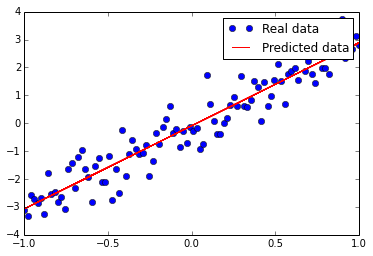

In [10]:
import tensorflow as tf;
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

# each value y is approximately linear but with some random noise.
X_input = np.linspace(-1, 1, 100)
Y_input = X_input * 3 + np.random.randn(X_input.shape[0]) * 0.5
plt.plot(X_input, Y_input, 'bo', label='Real data')


# STEP 2: create placeholder for input X(number of fire) and label Y(number of theft)
X = tf.placeholder(tf.float32, name="X")
Y = tf.placeholder(tf.float32, name="Y")

# STEP 3: create Variables(weight and bias here), initialize to 0.
w = tf.Variable(0.0, name="weight")
b = tf.Variable(0.0, name="bias")

# STEP 4: construct model to predict Y
Y_Predict = X * w + b

# STEP 5: define loss function(use square error here)
loss = tf.square(Y - Y_Predict, name="loss")

# STEP 6: define optimizer(here we use Gradient Descent with learning rate of 0.001)
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001).minimize(loss)

# define the epoch
epoch = 100
init = tf.global_variables_initializer()
# execute the model
with tf.Session() as sess:
    # STEP 7: initailize the necessary variable, in this case w and b.
    sess.run(init)
    
    # STEP 8: traning the model
    for i in range(epoch):
            sess.run(optimizer, feed_dict={X: X_input, Y: Y_input})
                
    # STEP 9: output the values of w and b.
    w_value, b_value = sess.run([w, b])

print w_value, b_value

# plot the predict line.
plt.plot(Y_input, Y_input * w_value + b_value, 'r', label='Predicted data')
plt.ylim([-4,4])
plt.xlim([-1, 1])
plt.legend()
plt.show()
